# <div style="text-align: center">Wairakei Lumped Parameter Model</div>

<div style="text-align: center"> <sub>ENCN404 - Special Topic: Modern Modelling Practices in Civil Engineering</sub></div>

$\,$

<div style="text-align: center"> University of Canterbury </div>

$\,$

<img src="img/geothermals.jpg" alt="Drawing" style="width: 800px;"/>

### Notebook instructions

Run cells containing code by clicking on them and hitting **Ctrl+Enter** or by Cell>Run Cells in the drop-down menu.

For queries, the course instructor or notebook author (David Dempsey)

In [2]:
# imports and environment: this cell must be executed before any other in the notebook
from wairakei import*

Hot water and steam have been extracted from the Wairakei geothermal system for the last 60 years, used to produce clean, renewable electricity. As water was extracted, pressure in the reservoir started to drop, eventually stabilizing.

Fortunately, much of this data is avaliable to help us develop a model of the system.

***Execute the cell below and answer the questions.***

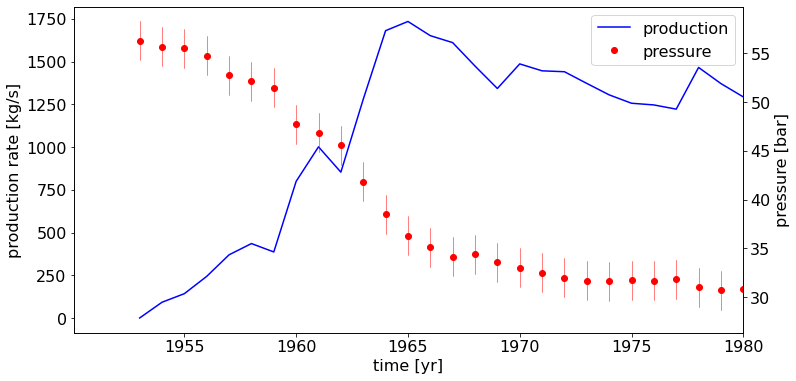

In [3]:
wairakei_data()

In [4]:
# From 1965, the production rate declines but is still quite high. 

# Suggest a reason why the pressure eventually stops declining.
# (Think about supplying heat to the centre of a metal plate - the temperature
# can't keep going up forever...)

# Does one of these curves 'cause' the other?

# If we were to build a model of the reservoir, would 'production' be an input 
# or an output? What about 'pressure'?



[Fradkin et al. [1981]](http://onlinelibrary.wiley.com/doi/10.1029/WR017i004p00929/full) introduced the **slow drainage** model for the Wairakei geothermal system.

1. Initially, the reservoir pressure is in equilibrium with the surrounding rock.
2. Water can **exit** the volume (usually from wells drilled into the middle). When it does, the pressure goes **down**. (Source/sink).
3. When the pressure drops, more water will try to **enter** the volume (usually at the base or the sides). When it does this, the pressure goes **up**. (Recharge).
4. The pressure drop due to extracting water is not immediate. Rather, there is a delay over time called "slow drainage". This introduces a dependence on the **rate of change of extraction rate**.

The lumped parameter model for a reservoir with slow drainage is:

$$ \frac{dP}{dt} = - a q - b (P-P_0) - c \frac{dq}{dt}$$

were $P$ is the reservoir pressure, $q$ is the extraction rate from the reservoir, and $a$, $b$ and $c$ are unknown parameters that depend on the reservoir.

***Execute the cell below.***

In [5]:
lpm_demo()

The slow drainage LPM has been implemented and fit through the Wairakei data below.

***Execute the cell below and answer the questions.***

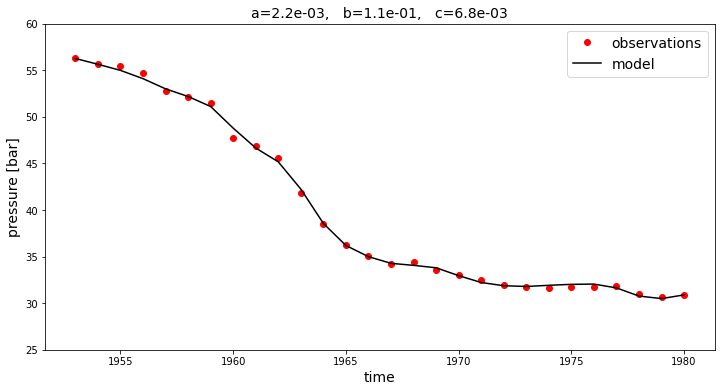

In [6]:
lpm_model()

In [7]:
# In this model, P is given in bar, time in years, q in kg/s, and dqdt in kg/s/year. 
# What are the dimensions of parameters 'a', 'b' and 'c'? What are the equivalent SI units?

In fact, there is some uncertainty in the measured pressure data. Reservoir engineers estimate the error variance could be as large as 2 bar. Thus, it seems reasonable that there are a range of models - a range for 'a', 'b' and 'c' - that could fit the data.

***Execute the cell below and answer the questions.***

In [8]:
lpm_models()

In [9]:
# Move the slider bars to determine acceptable ranges for the parameters 'a', 'b' and 'c'.

# Set the slider bars to their original positions.

# Change 'a' to 0.00264. Is this an acceptable model?

# Leave 'a' as 0.00264 and change 'b' to 0.132. Is this an acceptable model?

# Is a=0.00264 a plausible parameter value? Justify your answer.


Earlier we estimated the best fit values of $a$, $b$, and $c$ that parameterise a lumped parameter model of the Wairakei geothermal system. However, because the pressure data used to calibrate the model are uncertain, so too must be our estimates of the parameters.

We will proceed by proposing a **prior distribution** for each of these parameters. As we have some information about the parameters - an idea of which values fit the data quite well - we will consider a normally distributed prior for each, centred on the best-fit value. 


***Execute the cell below and answer the questions.***

In [10]:
lpm_posterior()

In [11]:
# Move the deviation sliders to widen or narrow priors of a, b and c.

# Add additional model samples by moving the 'samples' slider.

# Obtain defensible prior distributions for 'a', 'b', and 'c'.

# An implicit assumption of this approach is that 'a', 'b', and 'c' are uncorrelated.
# What does this mean? (review the linear model example)

# As more model samples are generated, the histograms on the RHS start to approximate the 
# theoretical distribution.

Above, we estimated prior distributions for the model parameters, $a$, $b$, and $c$. To make a prediction of the future, we need only sample each of those distributions and pass those parameter values into the model. 

As an exercise, we shall attempt to "predict" the pressure in the reservoir in 2012. This is something the good folk back in 1981 may have tried to do when, say, reconsenting Wairakei for the next 30 years.

Of course, since we actually have pressure measurements up to 2012, we'll be able to verify our forecast...

***Execute the cell below and answer the questions.***

In [12]:
sa = 1.1e-4
sb = 5.5e-3
sc = 1.7e-3
lpm_prediction(sa,sb,sc)

In [13]:
# Set prior width values sa, sb and sc in the cell above, then execute. You should obtain
# these values from the exercise in Section 3.2.4, see the TITLE of that plot for exact values.

# The lefthand figure samples the prior and extrapolates models out to 2012 (using the 
# actual flow-rate, bit of an inconsistency there...)

# The righthand figure shows a forecast of reservoir pressure in 2012.

# Use the slider bar to add more models. How does the shape and width of the forecast change?

# Click the "reveal future" button to compare your forecast against the actual data. 
# How did you do?

# Speculate on any discrepancy between your forecast and the actual outcome.

Sometimes, a self-proclaimed "expert" will assert that they **know** the value of a parameter. Maybe they do (to within some degree of accuracy). Maybe they don't and they're just an idiot. Most often, they don't, but they're a pragmatist that realises not *everything* can be treated as a free parameter for calibration.

Nevertheless, as soon as you fix a parameter to an incorrect value, you will introduce **structural error** into a model. Let's look at an example involving calibration and prediction.

Suppose we "know" the value of the parameter $c$ for the lumped parameter model. Great! Now we only need to calibrate two other parameters, $a$ and $b$, which won't take nearly as long.

Unfortunately, we picked the wrong value for $c$. Which means that, during calibration, values of $a$ and $b$ will end up **taking on best-fit values that are different to what they would otherwise have been** had we used a different value of $c$. This will ultimately affect our ability to make a prediction of the future (and to correctly characterise $a$ and $b$!)

***Execute the cell below and answer the questions.***

In [14]:
lpm_structural()

In [15]:
# The code above takes a FIXED value of c, and then calculates a and b
# that best fit the data. Use the slider to change the input value of c.

# How does the quality of the calibration change?

# How do the parameter values a and b change?

# How does the prediction of the future change?

# How does making a decision to fix a particular parameter value for c affect our ability
# to make a prediction of the future?

# We can think about calibration as an exercise in inverse modelling. That is, we are
# seeking the "true" values of 'a' and 'b' because they're too difficult to measure by
# other (more direct) means.

# How does making a decision to fix a particular parameter value for c affect our ability
# to do inverse modelling?
